# Sélection rapide

*C.A.R. Hoare, « Algorithm 65: find », Communications of the ACM, vol. 4, no 7,‎ 1961, p. 321-322*

<div align=center>Etant donné un tableau T de $n$ éléments, quel est le $(k+1)^{ieme}$ par ordre croissant ?</div>

#### Solution 1: trier

* appliquer le tri rapide sur T avec une complexité $\Theta(n\log n)$ 
* retourner `T[k]`

#### Cas particuliers

* pour $k=0$, retourner le minimum avec une complexité $\Theta(n)$ 
* pour $k=n-1$, retourner le maximum avec une complexité $\Theta(n)$ 

<div align=center>Quelle est la complexité du problème? <BR><BR> $\Theta(n\log n)$ ou  $\Theta(n)$ ?</div>

Hoare propose un algorithme proche du tri rapide, de complexité moyenne $\Theta(n)$.

* Choisir un pivot
* Partitionner autour de ce pivot
* Soit p la position du pivot partitionné
  * si `p < k`, répéter sur la partie droite
  * si `p > k`, répéter sur la partie gauche
  * sinon (`p==k`), sortir
* jusqu'à ce que la partition n'aie qu'un seul élément


Le résultat est un tableau partiellement trié.
* L'élément d'indice $k$ est le bon 
* le reste du tableau est partitionné autour de lui. 

## Mise en oeuvre

On reprend l'algorithme de partition du tri rapide. 

In [1]:
import include.helpers as asd1

In [2]:
def partition(T,premier,dernier,comparer = asd1.plus_petit):    
    pivot = dernier-1; i = premier; j = pivot-1

    while True:
        while i < pivot    and comparer(T[i],T[pivot]): i += 1
        while j >= premier and comparer(T[pivot],T[j]): j -= 1
        if j < i: break           
        asd1.echanger(T,i,j)
        i += 1; j -= 1

    asd1.echanger(T,i,pivot)
    return i

La sélection rapide n'ayant qu'un appel récursif, il est plus simple de l'écrire itérativement

In [3]:
def selection_rapide(T,k,comparer = asd1.plus_petit):
    premier = 0
    dernier = len(T)
    
    while premier < dernier-1:
        pivot = choix_du_pivot(T,premier,dernier)
        T[pivot],T[dernier-1] = T[dernier-1],T[pivot]
        
        pivot = partition(T,premier,dernier,comparer)
        
        if pivot < k:
            premier = pivot+1
        elif pivot > k:
            dernier = pivot
        else:
            break;
            
    return T[k]

In [4]:
import numpy as np
def choix_du_pivot(T,premier,dernier):
    return dernier-1
#    return np.random.randint(premier,dernier)

Testons l'algorithme

In [5]:
T = [ 1, 4, 3, 8, 5, 7, 2, 6 ]
k = 4
print(selection_rapide(T,k))
print(T[:k],T[k],T[k+1:])

5
[1, 4, 3, 2] 5 [6, 8, 7]


On voit que le contenu du tableau a bougé

L'élément d'indice k est à sa place triée et le reste du tableau est partitionné

## Complexité

Testons la complexité en cherchant la medianne de 10 à 100000 nombres aléatoires

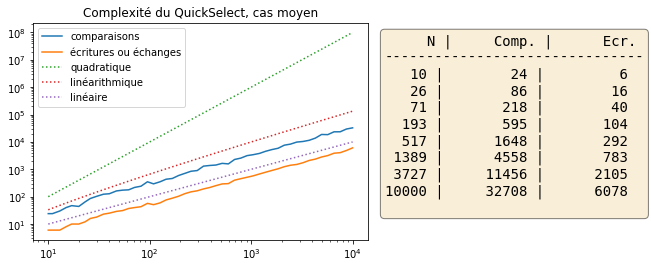

In [6]:
asd1.evalue_complexite_selection(selection_rapide,asd1.tableau_aleatoire,
                                 "QuickSelect, cas moyen")

La complexité est **linéaire en moyenne**.

Attention, un mauvais choix de pivot ou une grande malchance peut conduire au pire cas, de complexité quadratique. 

Par exemple, avec une entrée triée et un pivot en dernière position...

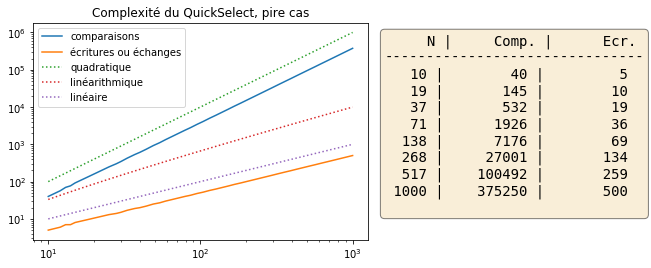

In [7]:
asd1.evalue_complexite_selection(selection_rapide,asd1.tableau_trie,
                                 "QuickSelect, pire cas",1,3)

## Conclusion

L'algorithme de **sélection rapide de Hoare** permet de trouver le $k^{ieme}$ élément d'un tableau selon un ordre donné. 

Il utilise le même algorithme de **partition** que le tri rapide

Il ne continue que sur **un seul côté** de la partition, contrairement au tri rapide.

Sa complexité moyenne est **linéaire** en $\Theta(n)$

Sa complexité dans le **pire des cas** est quadratique en $\Theta(n^2)$

[ASD1 Notebooks on GitHub.io](https://ocuisenaire.github.io/ASD1-notebooks/)

© Olivier Cuisenaire, 2018